In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as pt
import seaborn as sb
import warnings
warnings.filterwarnings('ignore')

In [3]:
gpd=pd.read_csv(r'https://raw.githubusercontent.com/dsrscientist/dataset3/main/glass.csv')
gpd

,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.00.1,1.1
0,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.00,1
1,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.00,1
2,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.00,1
3,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.00,1
4,6,1.51596,12.79,3.61,1.62,72.97,0.64,8.07,0.00,0.26,1
...,...,...,...,...,...,...,...,...,...,...,...
208,210,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.00,7
209,211,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.00,7
210,212,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.00,7
211,213,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.00,7


We can see that the column names are not present in the raw file so we will name the columns first.

In [9]:
gdf=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset3/main/glass.csv',names=['ID','RI','Na','Mg','Al','Si','K','Ca','Ba','Fe','Type of Glass'])
gdf

,ID,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type of Glass
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...
209,210,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,211,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,212,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,213,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


We can see that there are 214 rows and 11 columns present in the dataset with type of glass as our target variable.

In [311]:
gdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   RI             214 non-null    float64
 1   Na             214 non-null    float64
 2   Mg             214 non-null    float64
 3   Al             214 non-null    float64
 4   Si             214 non-null    float64
 5   K              214 non-null    float64
 6   Ba             214 non-null    float64
 7   Fe             214 non-null    float64
 8   Type of Glass  214 non-null    int64  
dtypes: float64(8), int64(1)
memory usage: 15.2 KB


We can see that there are no null values in any of the column. 

In [15]:
gdf.nunique()

ID               214
RI               178
Na               142
Mg                94
Al               118
Si               133
K                 65
Ca               143
Ba                34
Fe                32
Type of Glass      6
dtype: int64

As id column is just used to number each row so its not useful for our prediction so we will drop it. And our target variable( type of glass) has just 6 unique values so we can judge that its a classification problem.

In [18]:
gdf.drop(['ID'],axis=1,inplace=True)

In [19]:
gdf.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type of Glass
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


From above details, we notice that-
1) There is some skewness present in some columns as mean and median(50%) values are somewhat different.
2) There are some outliers present in some columns as 75% values and maximum values are a lot further from each other.
3) The standard deviation of each column.


## Correlation

In [20]:
gdf.corr()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type of Glass
RI,1.000000,-0.191885,-0.122274,-0.407326,-0.542052,-0.289833,0.810403,-0.000386,0.143010,-0.164237
Na,-0.191885,1.000000,-0.273732,0.156794,-0.069809,-0.266087,-0.275442,0.326603,-0.241346,0.502898
Mg,-0.122274,-0.273732,1.000000,-0.481799,-0.165927,0.005396,-0.443750,-0.492262,0.083060,-0.744993
Al,-0.407326,0.156794,-0.481799,1.000000,-0.005524,0.325958,-0.259592,0.479404,-0.074402,0.598829
Si,-0.542052,-0.069809,-0.165927,-0.005524,1.000000,-0.193331,-0.208732,-0.102151,-0.094201,0.151565
K,-0.289833,-0.266087,0.005396,0.325958,-0.193331,1.000000,-0.317836,-0.042618,-0.007719,-0.010054
Ca,0.810403,-0.275442,-0.443750,-0.259592,-0.208732,-0.317836,1.000000,-0.112841,0.124968,0.000952
Ba,-0.000386,0.326603,-0.492262,0.479404,-0.102151,-0.042618,-0.112841,1.000000,-0.058692,0.575161
Fe,0.143010,-0.241346,0.083060,-0.074402,-0.094201,-0.007719,0.124968,-0.058692,1.000000,-0.188278
Type of Glass,-0.164237,0.502898,-0.744993,0.598829,0.151565,-0.010054,0.000952,0.575161,-0.188278,1.000000


<Axes: >

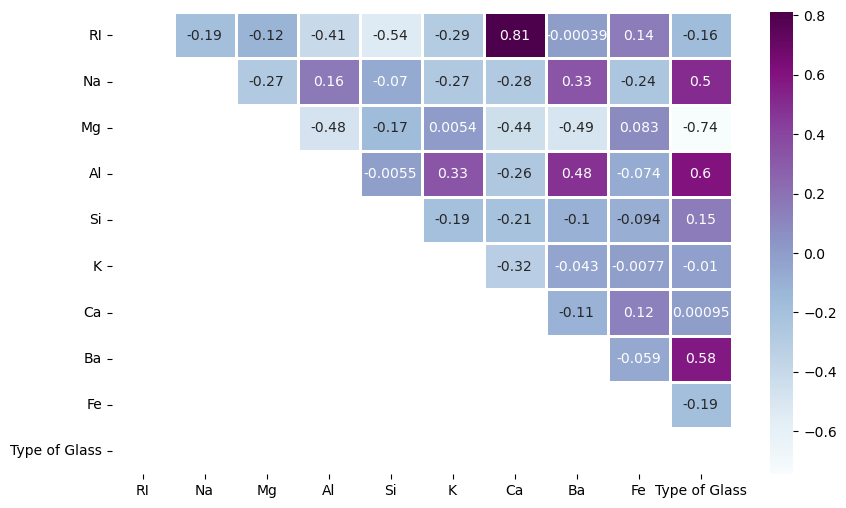

In [48]:
pt.figure(figsize=(10,6))
sb.heatmap(gdf.corr(), mask=np.tril(gdf.corr()),cmap='BuPu',annot=True,linewidth=1)

From above we see that the type of glass has high correlation with Barium, Aluminium, Magnesium and Sodium. Also type of glass has almost negligble relation with Calcium so we will drop that column.

In [49]:
gdf.drop(['Ca'], axis=1,inplace=True)

## Multivariate analysis

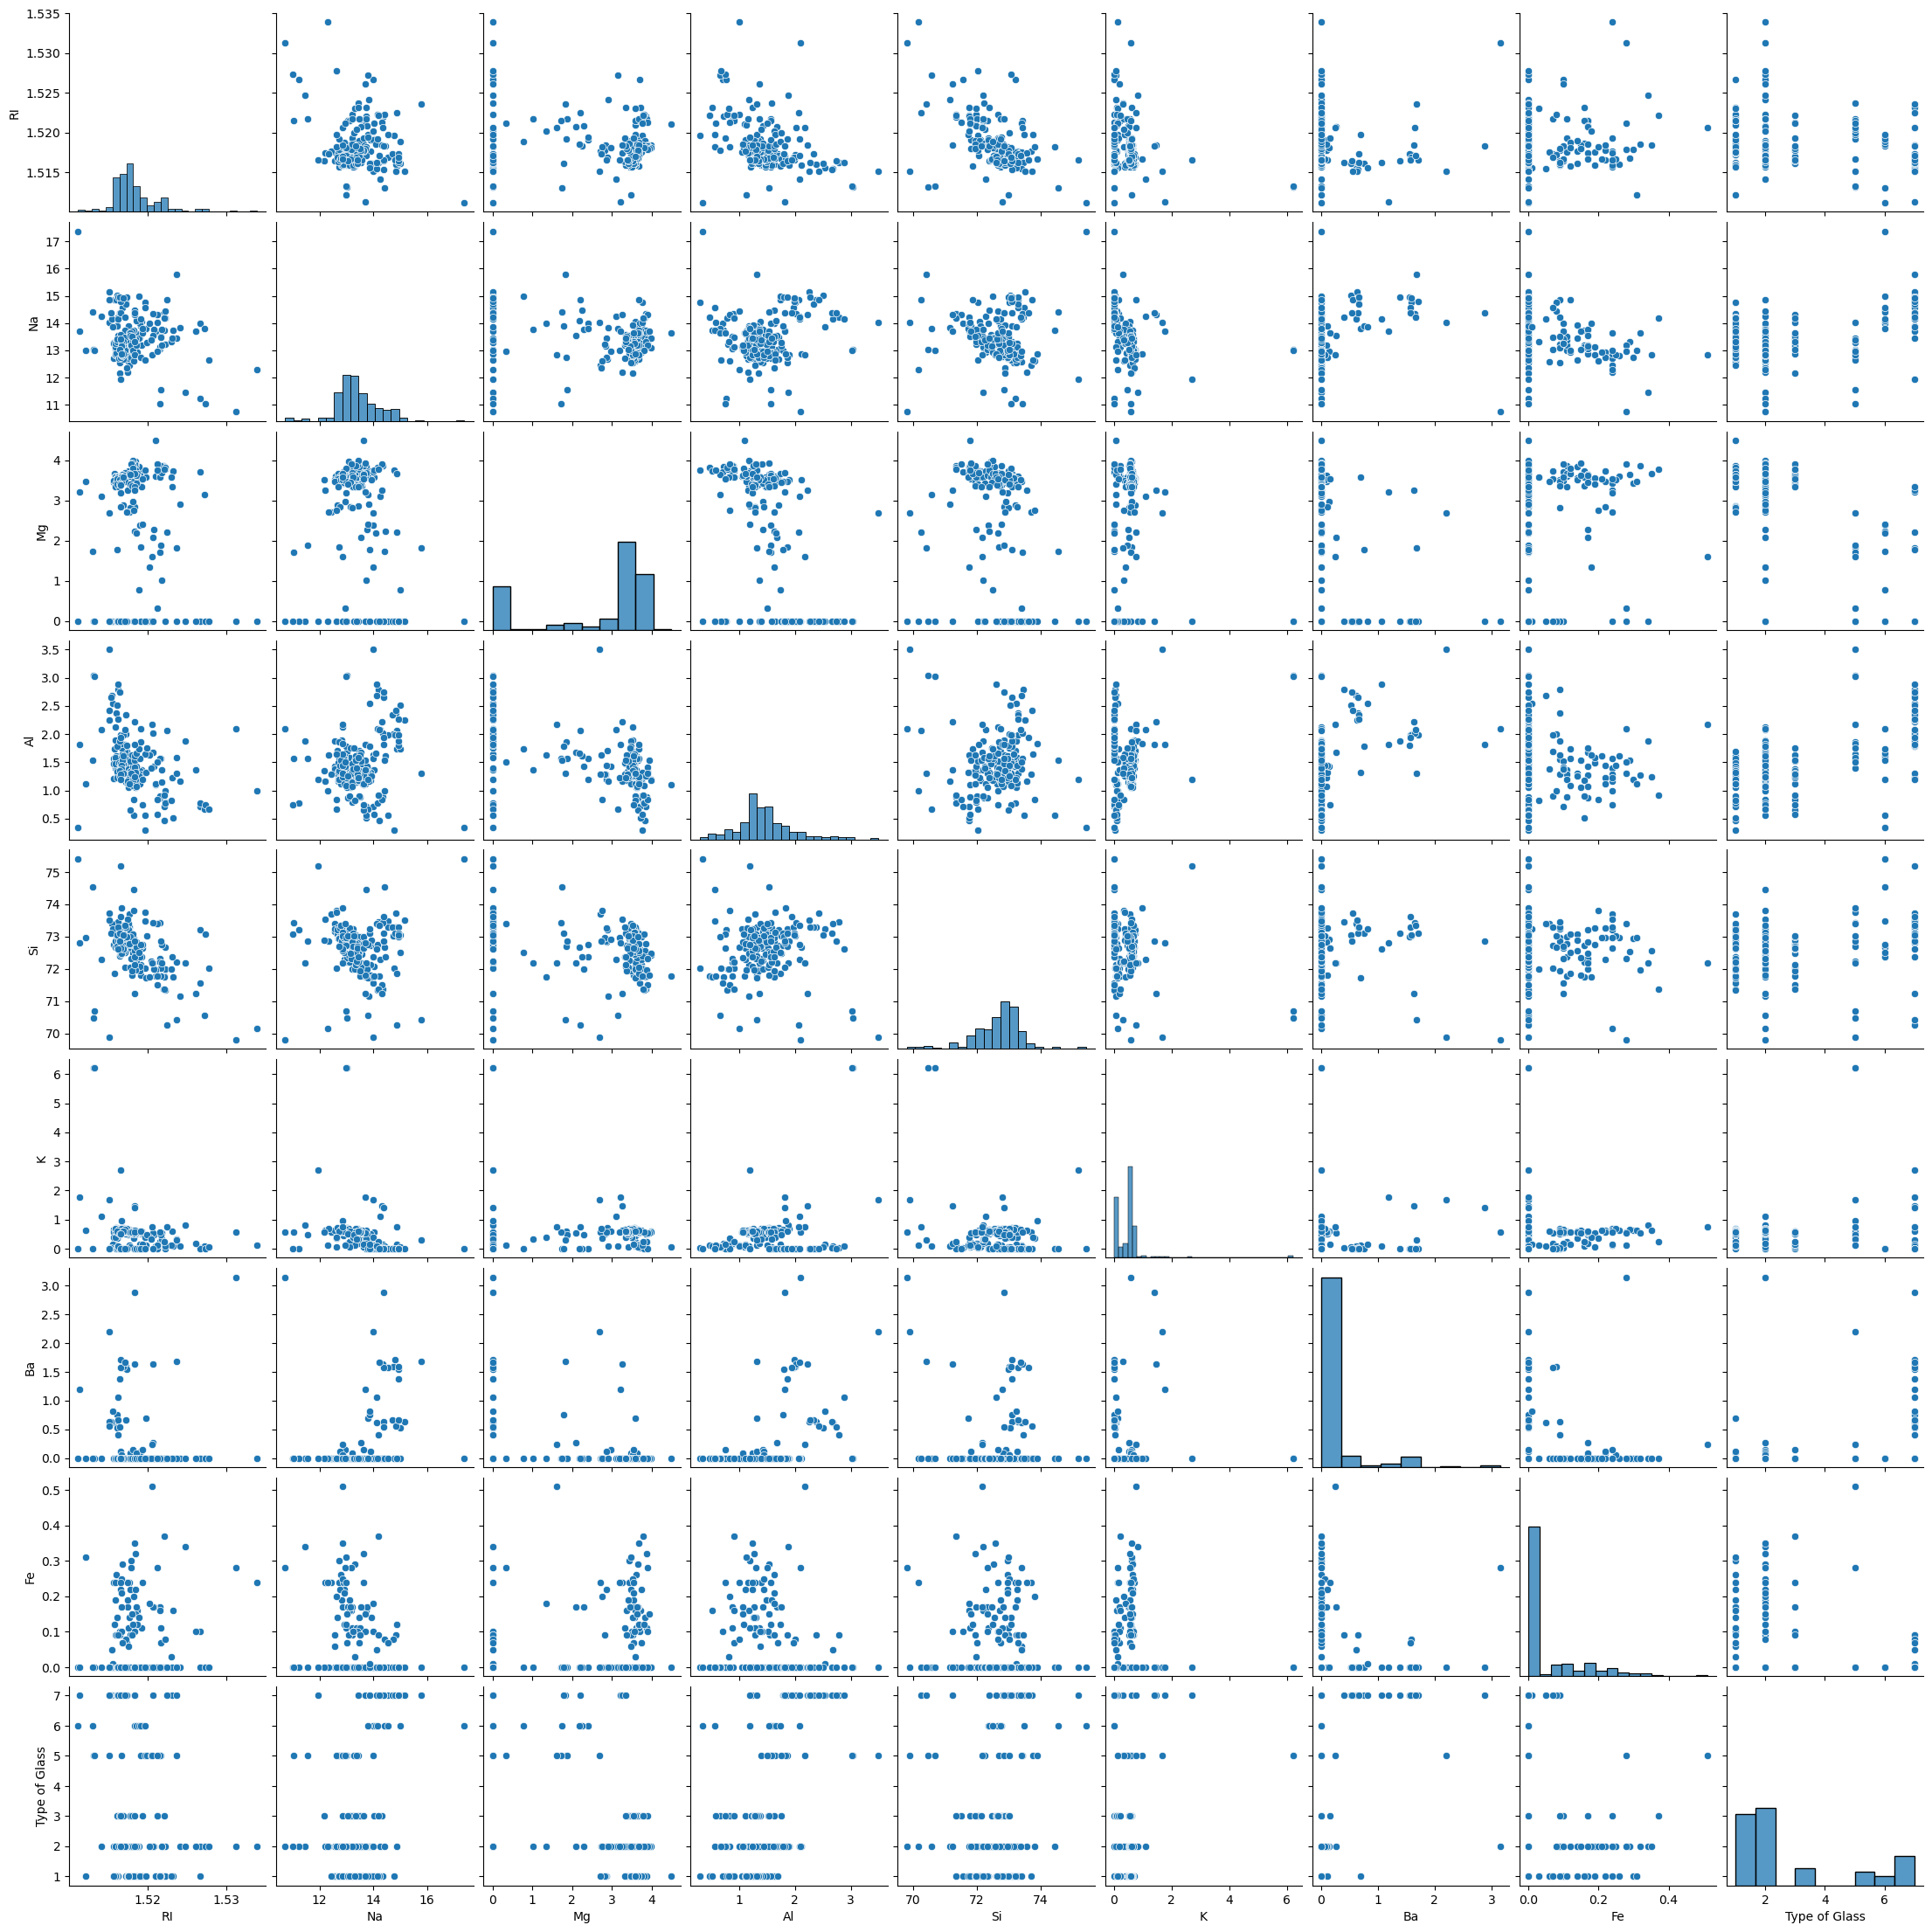

In [50]:
sb.pairplot(gdf)

## Bivariate analysis

Now as we know that 1-4 type of glass can be considered as window glasses (0) and 5-7 type of glasses can be considerd as non window glasses so we will classify them as 0 and 1 in another list to compare them during the bivariate analysis 

In [100]:
q=[]
for i in gdf["Type of Glass"]:
    if i <5:
        q.append(0)
    else:
        q.append(1)

<Axes: ylabel='Na'>

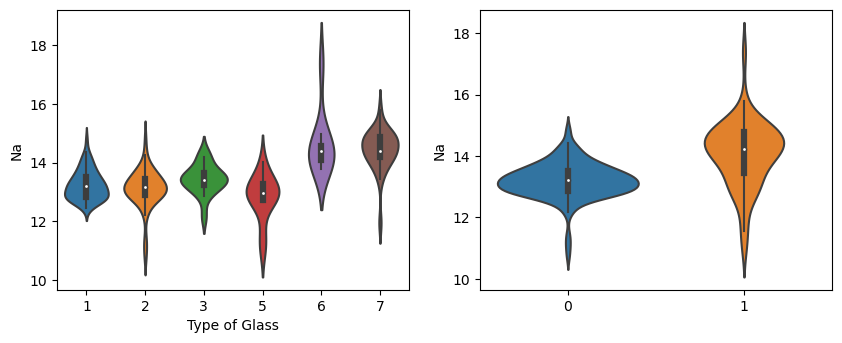

In [108]:
pt.figure(figsize=(10,8))
pt.subplot(221)
sb.violinplot(x='Type of Glass',y='Na',data=gdf)
pt.subplot(222)
sb.violinplot(x=q,y='Na',data=gdf)

From above we see that 6 and 7 type of glass has more Sodium content in them which may be the case they are differentiated as non window glasses

<Axes: ylabel='Al'>

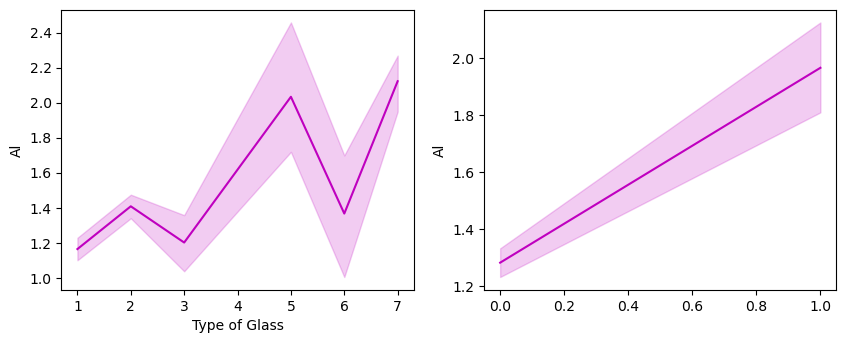

In [110]:
pt.figure(figsize=(10,8))
pt.subplot(221)
sb.lineplot(data=gdf,y='Al',x='Type of Glass',color='m')
pt.subplot(222)
sb.lineplot(data=gdf,y='Al',x=q,color='m')

From above we see that 5 and 7 type of glass has the most Aluminum content.

<Axes: ylabel='Ba'>

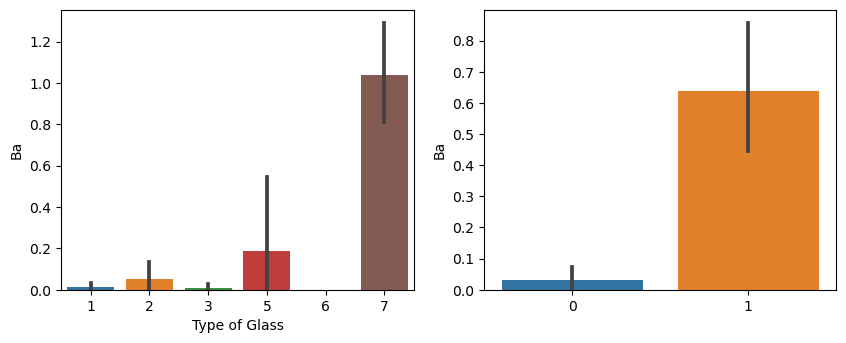

In [113]:
pt.figure(figsize=(10,8))
pt.subplot(221)
sb.barplot(data=gdf,y='Ba',x='Type of Glass')
pt.subplot(222)
sb.barplot(data=gdf,y='Ba',x=q)

From above we see that 7 type of glass has the highest content of barium

## Checking for Outliers


RI                  Axes(0.125,0.53;0.133621x0.35)
Na               Axes(0.285345,0.53;0.133621x0.35)
Mg                Axes(0.44569,0.53;0.133621x0.35)
Al               Axes(0.606034,0.53;0.133621x0.35)
Si               Axes(0.766379,0.53;0.133621x0.35)
K                   Axes(0.125,0.11;0.133621x0.35)
Ba               Axes(0.285345,0.11;0.133621x0.35)
Fe                Axes(0.44569,0.11;0.133621x0.35)
Type of Glass    Axes(0.606034,0.11;0.133621x0.35)
dtype: object

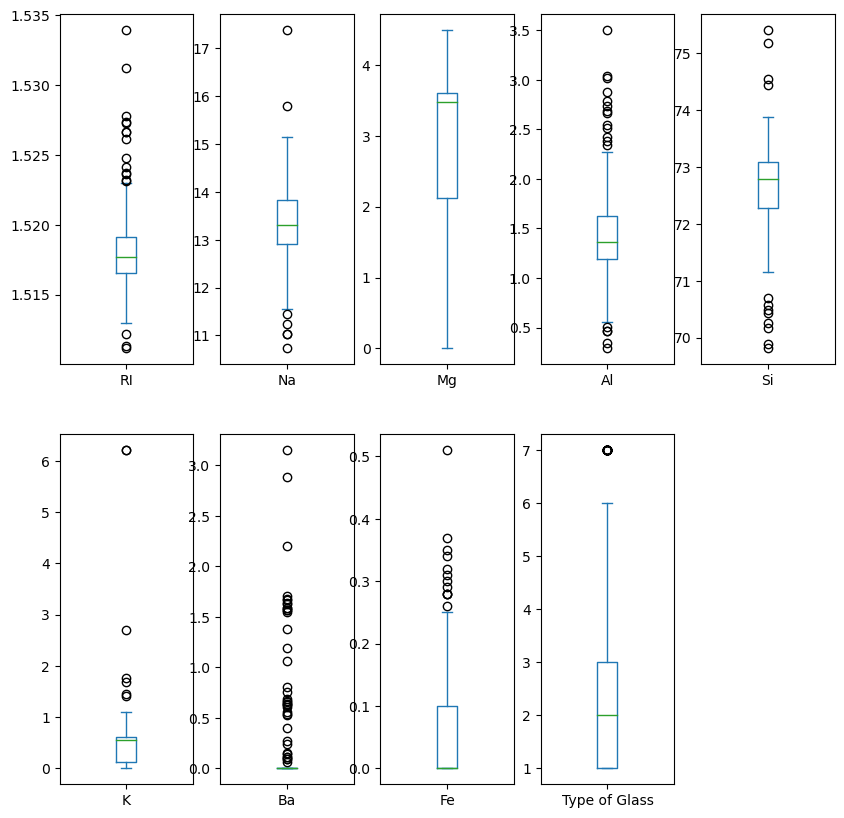

In [116]:
gdf.plot(kind='box',subplots=True,layout=(2,5),figsize=(10,10))

From above we can see that there are so many outliers present in many of the columns, so we will remove them first

In [323]:
from scipy.stats import zscore,boxcox
z=np.abs(zscore(gdf))
threshold=3
gdfnew=gdf[(z<3).all(axis=1)]
gdfnew

,RI,Na,Mg,Al,Si,K,Ba,Fe,Type of Glass
0,1.52101,13.64,4.49,1.10,71.78,0.06,0.00,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,0.00,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,0.00,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,0.00,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...
208,1.51640,14.37,0.00,2.74,72.85,0.00,0.54,0.0,7
209,1.51623,14.14,0.00,2.88,72.61,0.08,1.06,0.0,7
210,1.51685,14.92,0.00,1.99,73.06,0.00,1.59,0.0,7
211,1.52065,14.36,0.00,2.02,73.42,0.00,1.64,0.0,7


Data Loss=(214-198)/214*100= 7.47% . As its below 10% it is acceptable

## Skewness 

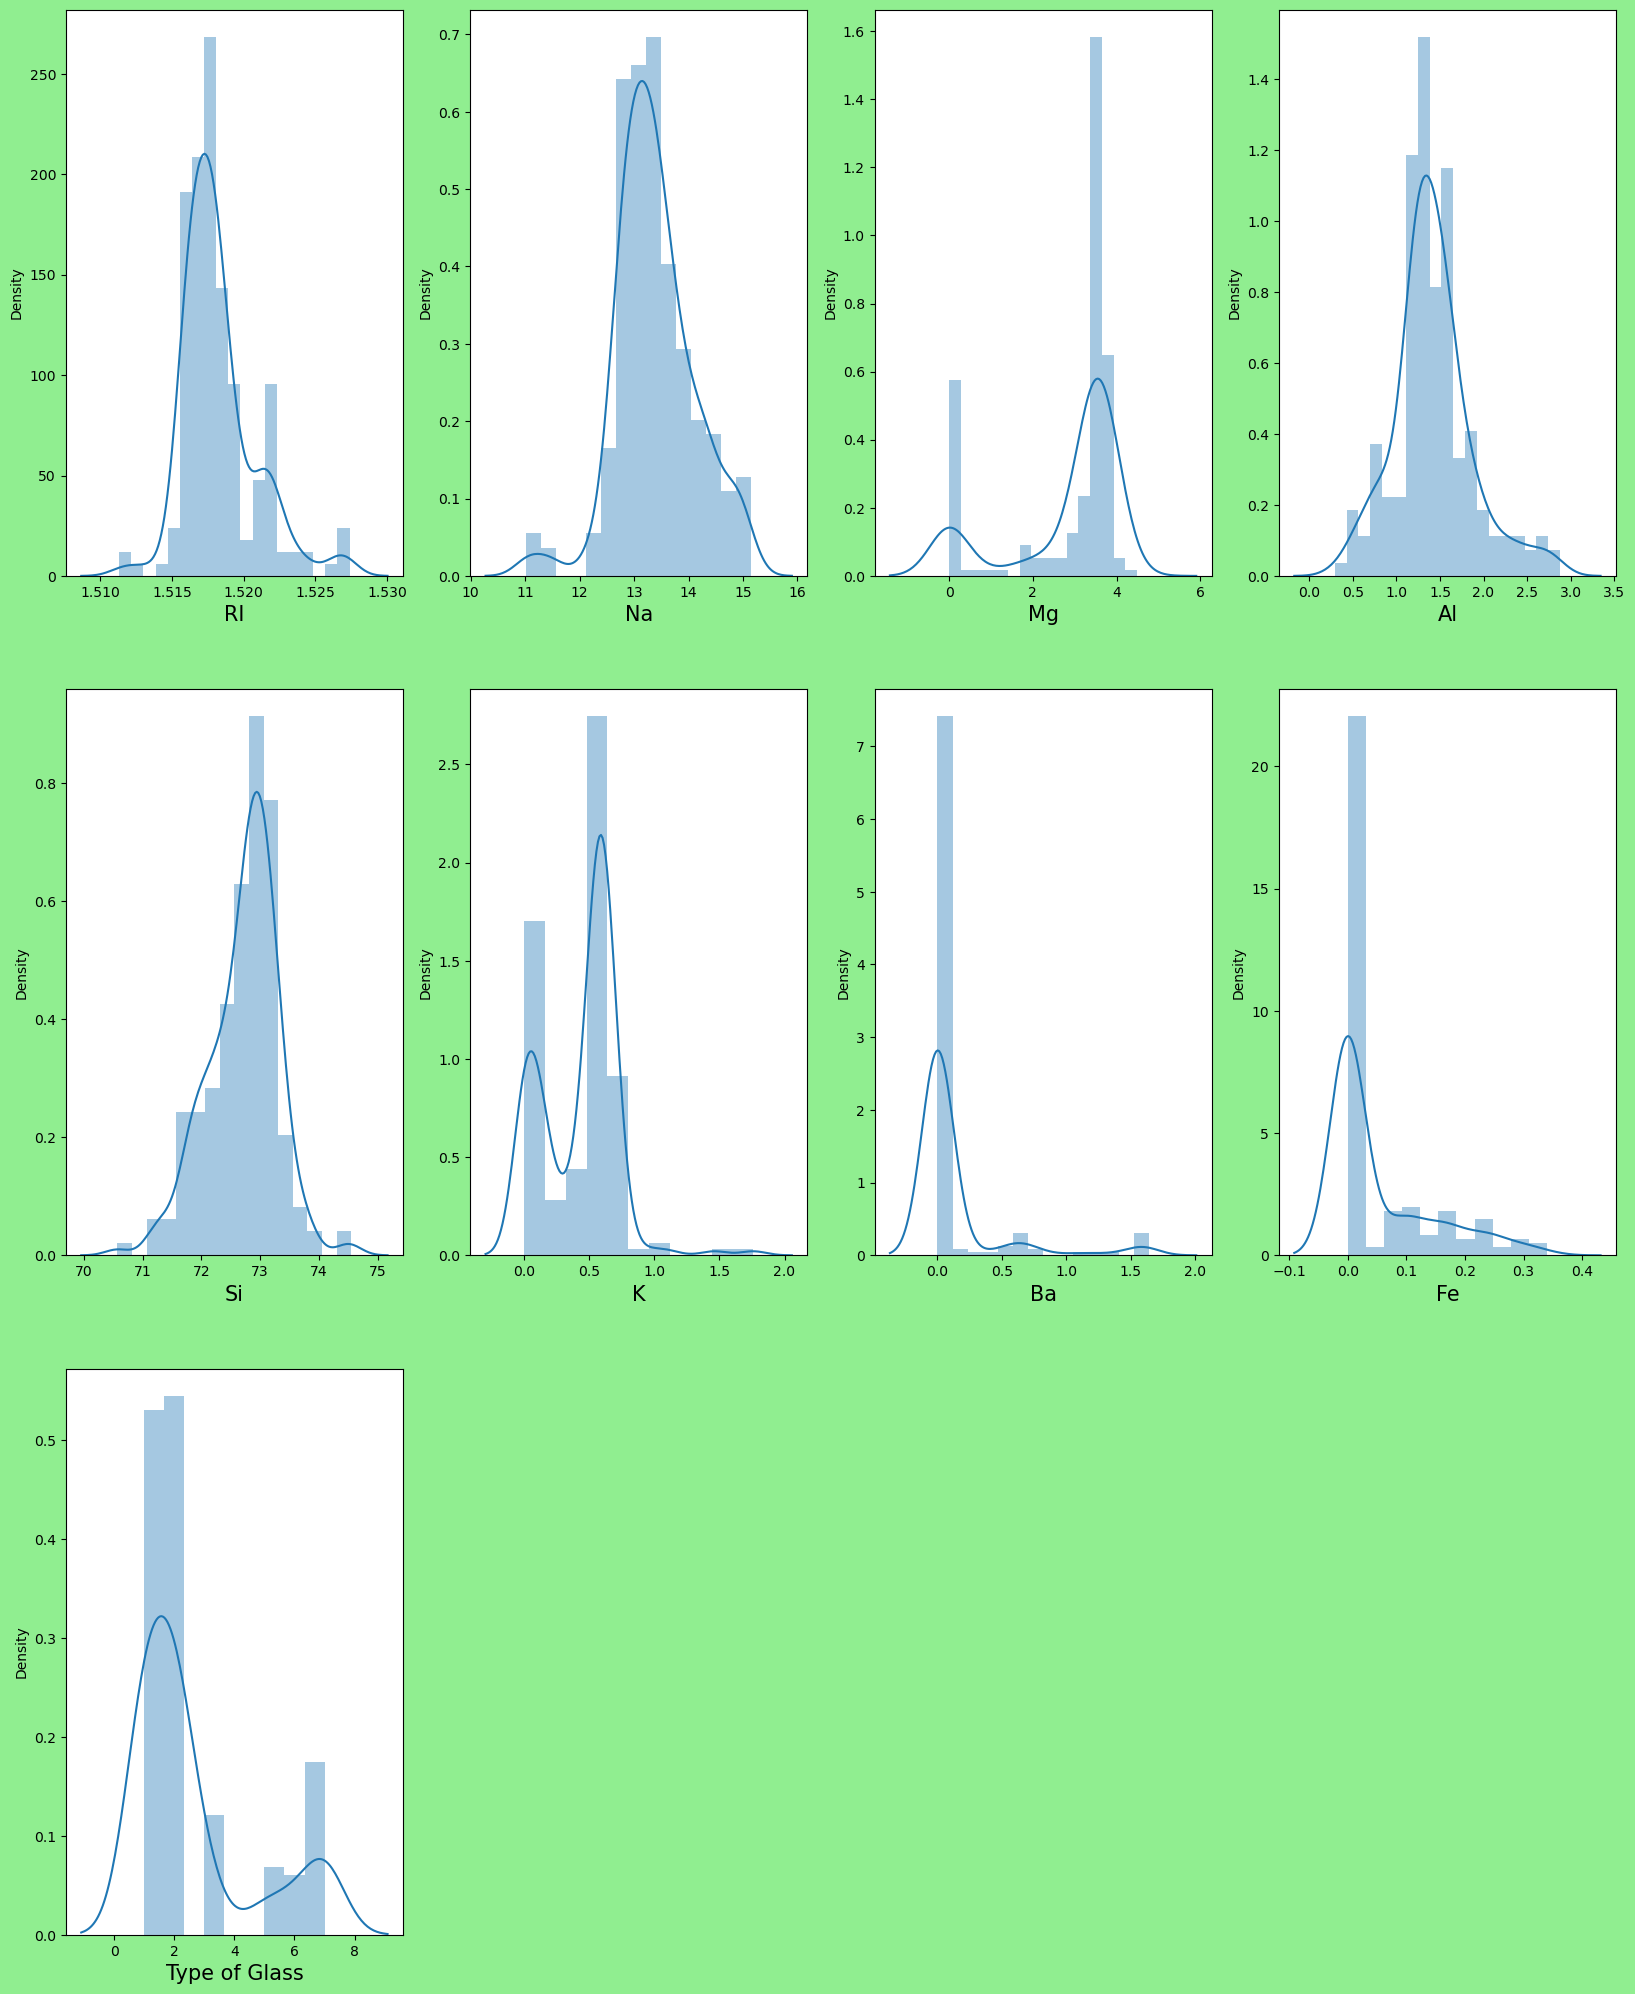

In [125]:
pt.figure(figsize=(20,25), facecolor='lightgreen')
ptno=1

for c in gdfnew:
    if ptno<=12:
        ax=pt.subplot(3,4,ptno)
        sb.distplot(gdfnew[c])
        pt.xlabel(c,fontsize=15)
        
    ptno+=1

In [190]:
gdfnew.skew()

RI               1.187750
Na              -0.006770
Mg              -1.407472
Al               0.641092
Si              -0.453578
K                0.302146
Ba               3.229584
Fe               1.509613
Type of Glass    1.311543
dtype: float64

We can see that there is some skewness present in Barium so we will remove it


In [308]:
gdfnew['Ba']=np.cbrt(gdfnew['Ba'])

In [309]:
gdfnew.skew()

RI               1.187750
Na              -0.006770
Mg              -1.407472
Al               0.641092
Si              -0.453578
K                0.302146
Ba               1.911079
Fe               1.509613
Type of Glass    1.311543
dtype: float64

Skewness is decreased from barium

## Balancing the data 

In [325]:
q=[]
for i in gdfnew["Type of Glass"]:
    if i <5:
        q.append(0)
    else:
        q.append(1)
gdfnew["Type of Glass"]=q

<Axes: xlabel='Type of Glass', ylabel='count'>

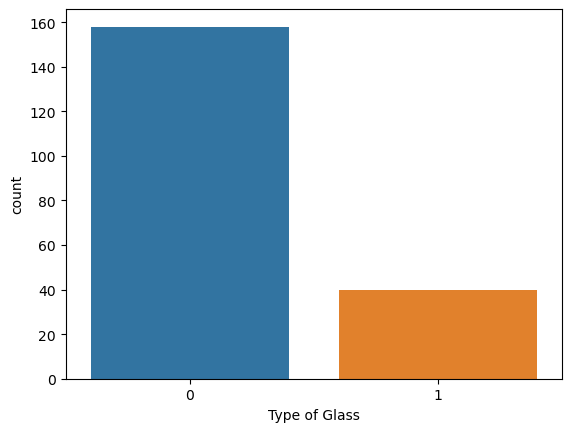

In [326]:
sb.countplot(x=gdfnew['Type of Glass'])

The data is not balanced

In [341]:
f=gdfnew.drop(['Type of Glass'],axis=1)
t=gdfnew['Type of Glass']
from imblearn.over_sampling import SMOTE
smt=SMOTE(random_state=0,k_neighbors=1)
train_x,train_y=smt.fit_resample(f,t)
train_y.value_counts()

0    158
1    158
Name: Type of Glass, dtype: int64

<Axes: xlabel='Type of Glass', ylabel='count'>

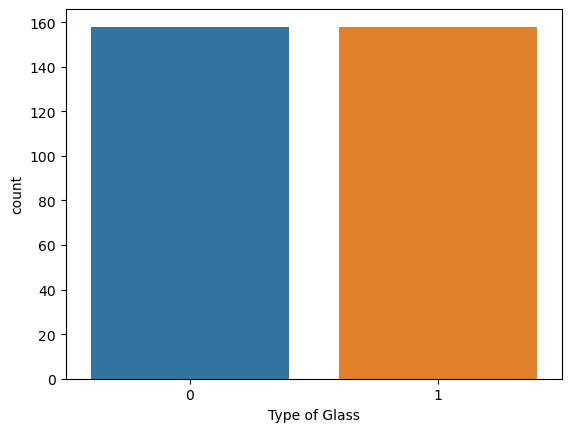

In [329]:
sb.countplot(x=train_y)

Data is balanced now

## Standardizing the data 

In [339]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
scaled_x=sc.fit_transform(train_x)
scaled_x

array([[ 1.18289543,  0.0760482 ,  1.51044717, ..., -0.84940893,
        -0.54996253, -0.5084078 ],
       [-0.2375386 ,  0.36521538,  0.95222392, ...,  0.38004555,
        -0.54996253, -0.5084078 ],
       [-0.83495644, -0.05118536,  0.92086307, ...,  0.11659102,
        -0.54996253, -0.5084078 ],
       ...,
       [ 1.40393054, -2.85373026, -0.21771435, ...,  0.62595839,
        -0.54996253, -0.5084078 ],
       [-0.7612393 ,  0.85226769, -1.30575776, ..., -0.965056  ,
         0.75009245, -0.5084078 ],
       [ 0.43376236,  0.36579976,  0.19983186, ..., -1.02504529,
        -0.54996253, -0.5084078 ]])

The data is scaled now

## Checking for multicollinearity using VIF

In [343]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['Features'] = train_x.columns
vif['vif'] = [variance_inflation_factor(scaled_x,i) for i in range(scaled_x.shape[1])]
vif

,Features,vif
0,RI,5.819750
1,Na,5.064734
2,Mg,7.050919
3,Al,4.761042
4,Si,4.568938
5,K,2.756108
6,Ba,2.162109
7,Fe,1.067967


As no value is more than 10 so all the values are in acceptable range and thus there is no multicollinearity present

## Fitting the models now


In [333]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [334]:
models=[GaussianNB(),LogisticRegression(),RandomForestClassifier(),KNeighborsClassifier(),DecisionTreeClassifier(), SVC()]

In [348]:
maxAcc = 0
maxRS = 0

for i in range(1,50):
    x_train,x_test,y_train,y_test = train_test_split(scaled_x,train_y,test_size = .30, random_state=i)
    for m in models:
        m.fit(x_train,y_train)
        m.score(x_train,y_train)
        pred = m.predict(x_test)
        acc = accuracy_score(y_test,pred)
        if acc>maxAcc:
            maxAcc = acc
            maxRs=i
print("Best Accuracy is:", maxAcc, "on Random State:", maxRs)

Best Accuracy is: 1.0 on Random State: 19


In [349]:
x_train,x_test,y_train,y_test = train_test_split(train_x,train_y,test_size = .30, random_state=19)

In [350]:
for m in models:
    m.fit(x_train,y_train)
    m.score(x_train,y_train)
    predm=m.predict(x_test)
    print('Accuracy score of', m, 'is: ',accuracy_score(y_test,predm))
    print ('\n','Confusion matrix:','\n',confusion_matrix(y_test,predm))
    print ('\n','Classification Report:','\n',classification_report(y_test,predm))
    print('\n')

Accuracy score of GaussianNB() is:  0.8421052631578947

 Confusion matrix: 
 [[49  1]
 [14 31]]

 Classification Report: 
               precision    recall  f1-score   support

           0       0.78      0.98      0.87        50
           1       0.97      0.69      0.81        45

    accuracy                           0.84        95
   macro avg       0.87      0.83      0.84        95
weighted avg       0.87      0.84      0.84        95



Accuracy score of LogisticRegression() is:  0.9157894736842105

 Confusion matrix: 
 [[50  0]
 [ 8 37]]

 Classification Report: 
               precision    recall  f1-score   support

           0       0.86      1.00      0.93        50
           1       1.00      0.82      0.90        45

    accuracy                           0.92        95
   macro avg       0.93      0.91      0.91        95
weighted avg       0.93      0.92      0.91        95



Accuracy score of RandomForestClassifier() is:  0.9894736842105263

 Confusion matrix: 


From above we see that RandomForest, DecisionTree and Kneighbors all are working at the same accuracy so we will use one of them and use gradient boosting


In [351]:
from sklearn.model_selection import cross_val_score
rfc=RandomForestClassifier()
rfc.fit(x_train,y_train)

RandomForestClassifier()

In [352]:
pred = rfc.predict(x_test)
ls=accuracy_score(y_test,pred)
lscore= cross_val_score(rfc,x_train,y_train)
lsc=lscore.mean()

lscore_selected=cross_val_score(rfc,x_train,y_train,cv=6).mean()
print("The cv score is: ", lscore_selected,"\nThe accuracy score is: ", ls)

The cv score is:  0.9275525525525526 
The accuracy score is:  0.9894736842105263


## Hyperparameter Tuning 

In [353]:
from sklearn.model_selection import GridSearchCV

In [354]:
param={'max_features':['auto','sqrt','log2'],
      'max_depth':(10,100),
      'criterion':['gini','entropy'],}
gss=GridSearchCV(rfc,param,cv=5)
gss.fit(x_train,y_train)
gss.best_params_

{'criterion': 'gini', 'max_depth': 10, 'max_features': 'auto'}

In [355]:
final_model=RandomForestClassifier(max_features='auto',criterion='gini',max_depth=10)
final_model.fit(x_train, y_train)
fmod_pred = final_model.predict(x_test)
fmod_acc = (accuracy_score(y_test, fmod_pred))*100
print("Accuracy score for the Best Model is:", fmod_acc)

Accuracy score for the Best Model is: 98.94736842105263


## ROC curve

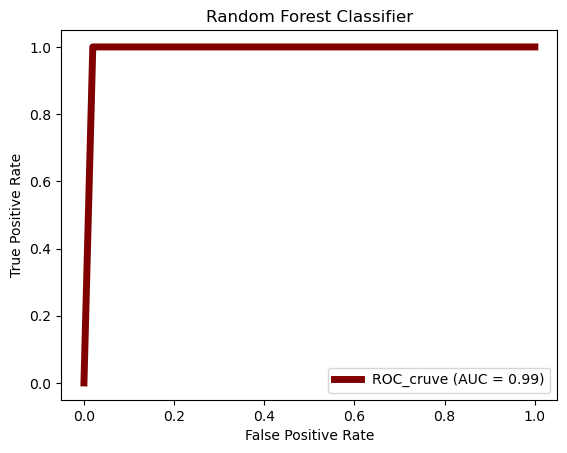

In [357]:
from sklearn import metrics
fpr, tpr, thresholds = metrics.roc_curve(fmod_pred, y_test)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc,estimator_name='ROC_cruve')
display.plot(lw=5,color='maroon')
pt.title('Random Forest Classifier')
pt.show()

## PLotting Confusion Matrix

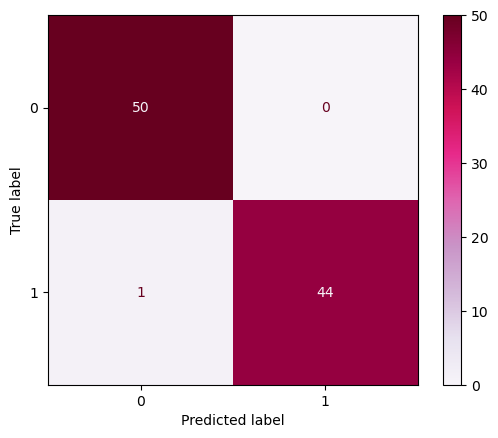

In [376]:
from sklearn.metrics import ConfusionMatrixDisplay
cm = confusion_matrix(y_test, fmod_pred)
cm_display = ConfusionMatrixDisplay(cm).plot(cmap='PuRd')

## Saving the model 

In [392]:
import joblib
joblib.dump(final_model,'glass_identification.obj')

['glass_identification.obj']

## Predicting random values

In [390]:
def glass_ident(x):
    array=np.asarray(x)
    reshaped=array.reshape(1,-1)
    prediction=rfc.predict(reshaped)
    if prediction==0:
        print('The type of glass is window')
    else:
        print('The type of glass is non-window')

In [393]:
glass_ident([1,11.7,2.4,1.5,73,0.3,1.4,0])

The type of glass is non-window
